In [1]:
import pandas as pd #for data anlysis
import numpy as np #for linear algebra and scientific approach
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# %matplotlib inline

In [2]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
full_df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w',edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:
        # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

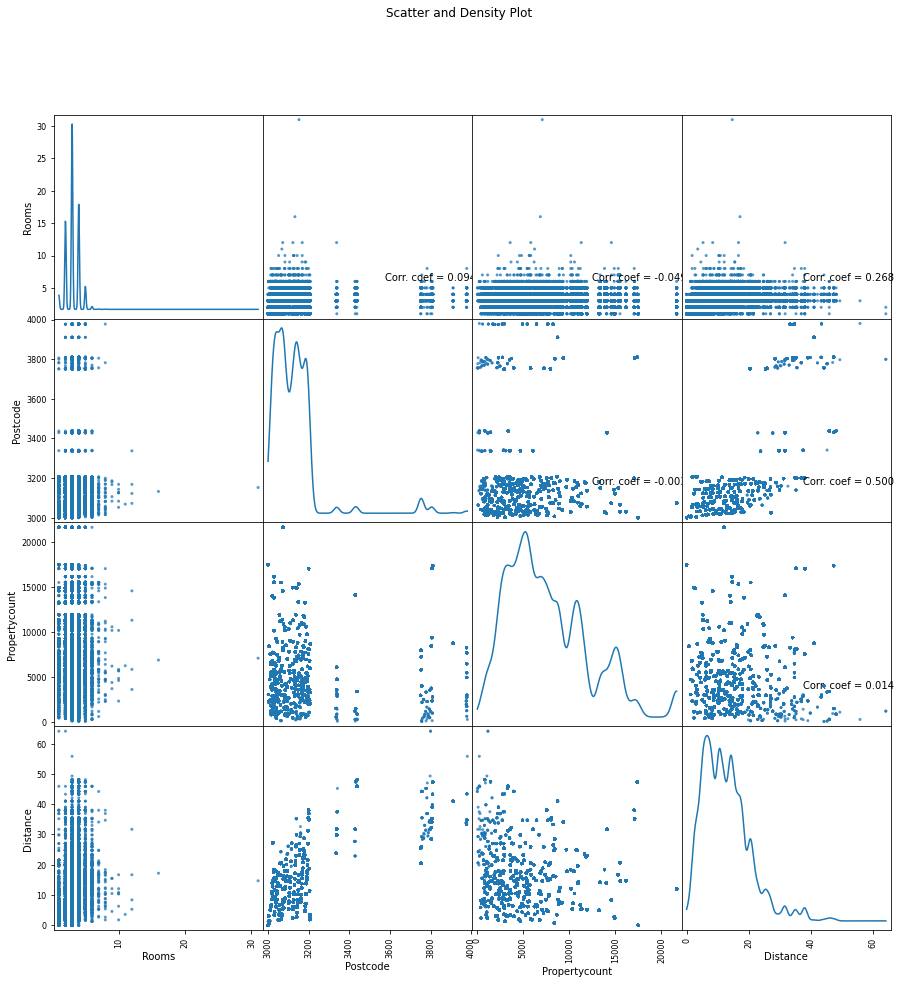

In [8]:
plotScatterMatrix(df, 15, 10)

<ipython-input-6-b41ae6e4c030>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-6-b41ae6e4c030>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-6-b41ae6e4c030>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-6-b41ae6e4c030>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


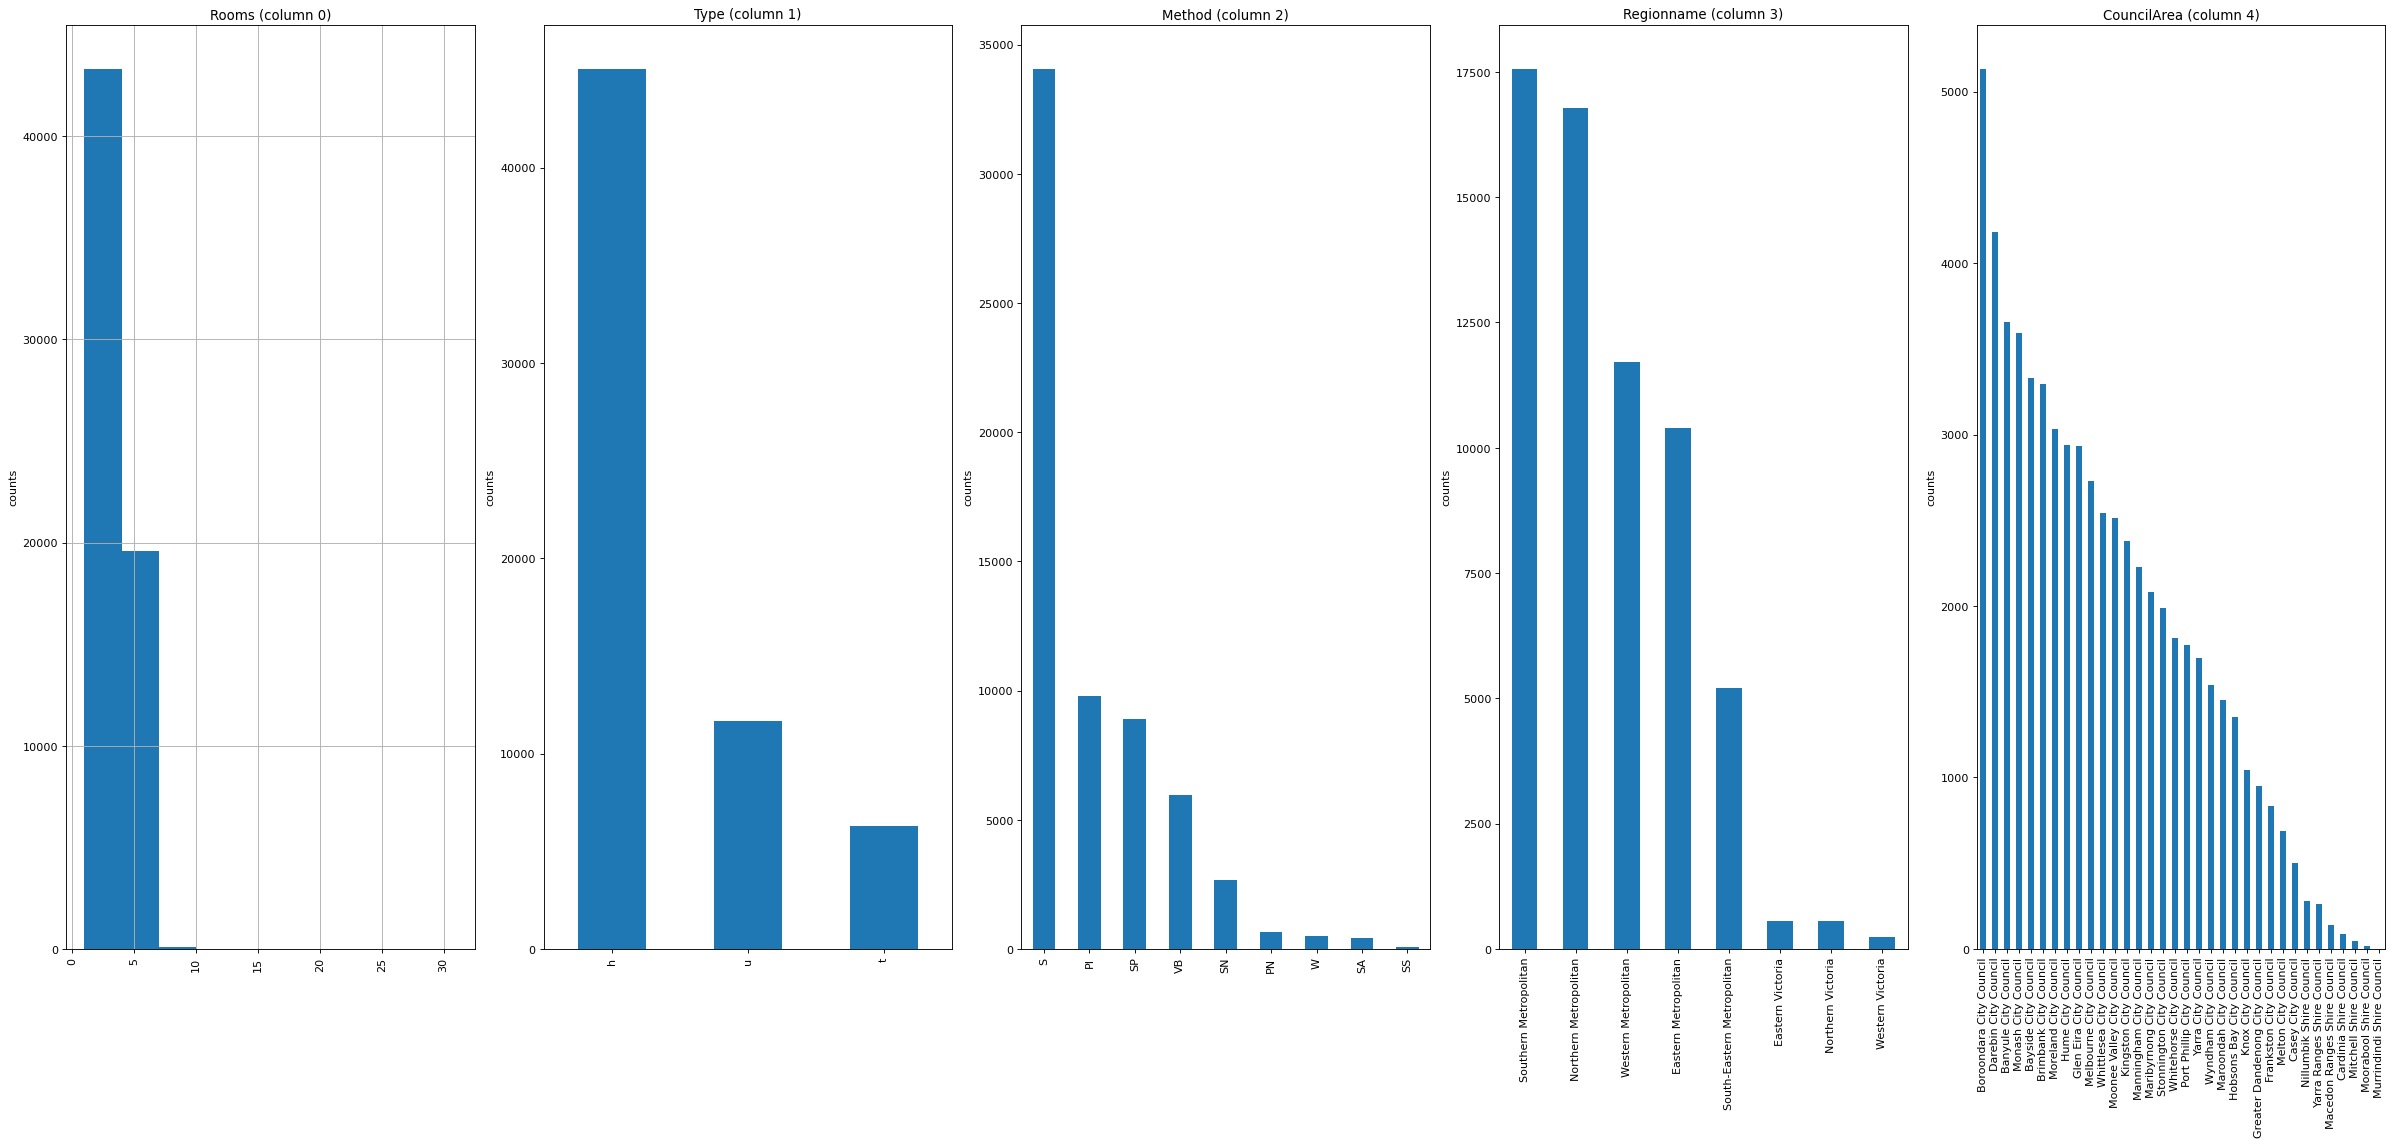

In [9]:
plotPerColumnDistribution(df, 10, 5)

In [10]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] 
    # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) s less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

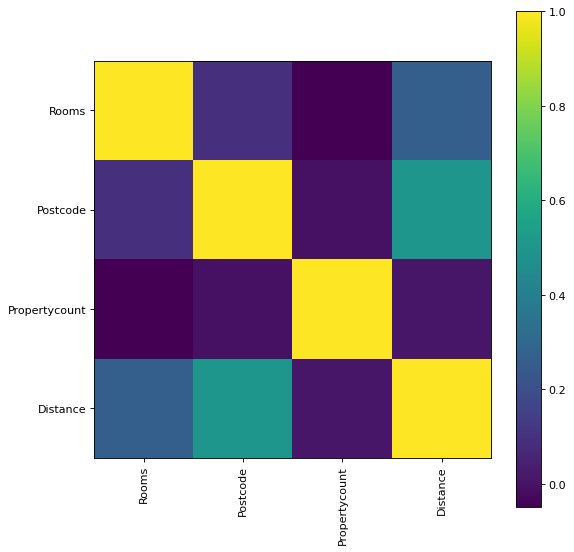

In [11]:
plotCorrelationMatrix(df, 8)

In [12]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [13]:
df = pd.concat([df, pd.get_dummies(df["Type"]), pd.get_dummies(df["Method"]),
pd.get_dummies(df["Regionname"])], axis=1)
df = df.drop(["Suburb", "Address", "SellerG", "CouncilArea", "Type", "Method", "Regionname"], 1)
df['Date'] = [pd.Timestamp(x).timestamp() for x in df["Date"]]
df = df.dropna()
df.head()

,Rooms,Price,Date,Postcode,Propertycount,Distance,h,t,u,PI,...,VB,W,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,3,1490000.0,1.483488e+09,3067,4019,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,1220000.0,1.483488e+09,3067,4019,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1420000.0,1.483488e+09,3067,4019,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1515000.0,1.483488e+09,3040,1543,7.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,670000.0,1.483488e+09,3042,3464,10.4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X = df.drop("Price", 1)
Y = df["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
from numpy import mean
from sklearn.model_selection import KFold
def evaluate_model(model):
  KF=KFold(n_splits=10)
  score=cross_val_score(model,X_train,Y_train,scoring='r2',cv=KF)
  score=round((mean(score)*100),3)
  return score

In [15]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, Y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, Y_test))
y_pred = lr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print("Cross Validation Score: ", cross_val_score(lr, X_test, Y_test, cv=5))
score=round((lr.score(X_test,Y_test))*100,3);
print("Normal Accuracy: ",score);
print("KFold Accuracy: ",evaluate_model(LinearRegression()));

Linear Regression R^2 Score:  0.5265985966992923
Linear Regression Test R^2 Score:  0.5340314734991174
Mean Squared Error:  162865790783.53787
Mean Absolute Error:  265737.4774061814
Cross Validation Score:  [0.53784687 0.5223382  0.52882692 0.54102682 0.53321137]
Normal Accuracy:  53.403
KFold Accuracy:  52.619


In [16]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=12)
rfr.fit(X_train, Y_train)
print("Random Forest R^2 Score: ", rfr.score(X_train, Y_train))
print("Random Forest Test R^2 Score: ", rfr.score(X_test, Y_test))
y_pred = rfr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
print("Cross Validation Score: ", cross_val_score(rfr, X_test, Y_test, cv=5))
score=round((rfr.score(X_test,Y_test))*100,3);
print("Normal Accuracy: ",score);
print("KFold Accuracy: ",evaluate_model(rfr));

Random Forest R^2 Score:  0.6235684811551312
Random Forest Test R^2 Score:  0.6202678189207976
Mean Squared Error:  132724376090.03352
Mean Absolute Error:  232657.809473647
Cross Validation Score:  [0.64380243 0.61436546 0.6257964  0.62274661 0.62215182]
Normal Accuracy:  62.027
KFold Accuracy:  62.161


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train=X_train[:10000]
Y_train=Y_train[:10000]
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit( X_train[['Rooms','Propertycount']],Y_train)
y_pred=clf.predict( X_test[['Rooms','Propertycount']])

In [18]:
print("SVM R^2 Score: ", clf.score(X_train[['Rooms','Propertycount']], Y_train))
print("SVM R^2 Score: ", clf.score(X_test[['Rooms','Propertycount']], Y_test))
print("Mean Squared Error: ", mean_squared_error(y_pred, Y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, Y_test))
#print("Cross Validation Score: ",cross_val_score(clf,X_test[['Rooms','Propertycount']][:1000],Y_test,cv=5))
score=round((clf.score(X_test[['Rooms','Propertycount']],Y_test))*100,3);
print("Normal Accuracy: ",score);
print("KFold Accuracy: ",evaluate_model(clf));

SVM R^2 Score:  0.0178
SVM R^2 Score:  0.009806957778465986
Mean Squared Error:  323240359502.78436
Mean Absolute Error:  371621.5024259317
Normal Accuracy:  0.981
KFold Accuracy:  33.17
